#Sample code for emsamble learning

Load libraries

In [1]:
!pip install catboost

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import preprocessing
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Read data

In [0]:
# read the breast cancer wisconsin dataset
dataset = load_breast_cancer()

In [4]:
#30 features
dataset['data'].shape

(569, 30)

In [5]:
#binary target
dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
dataset['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [7]:
dataset['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

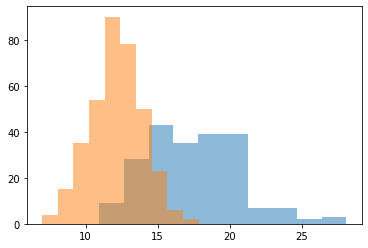

In [8]:
# show data
plt.hist(dataset['data'][:, 0][dataset['target']==0], label=dataset['target_names'][0], alpha=0.5)
plt.hist(dataset['data'][:, 0][dataset['target']==1], label=dataset['target_names'][1], alpha=0.5)
plt.show()

In [0]:
# image(numpy.ndarray)
X = dataset.data

# label(numpy.ndarray)
y = dataset.target

In [0]:
#split dataset to train and test dataset
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True)#default is True

In [11]:
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

455 114
455 114


In [0]:
def kth_cross_validation(model):
   #k-th cross validation
   cv = 3 #the number of foldings
   scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
   return scores

###Voting

In [0]:
models = [('decision tree', DecisionTreeClassifier()),
                ('random forest' , RandomForestClassifier()),
                ('extra trees' , ExtraTreesClassifier()),
                ('gradient boosting' , GradientBoostingClassifier()),
                ('xgboost' , XGBClassifier()),
                ('catboost' , CatBoostClassifier(verbose=False))]

In [0]:
def vote(models, vorting='hard'):
   voting = VotingClassifier(estimators=models, voting='hard')
   for model in models:
     scores = kth_cross_validation(model[1])
     print(model[0], scores.mean())
   print('voting ' + vorting, kth_cross_validation(voting).mean())

In [15]:
vote(models, vorting='hard')

decision tree 0.9209509701405832
random forest 0.964868711513884
extra trees 0.964868711513884
gradient boosting 0.9538892761705587
xgboost 0.9670616939700244
catboost 0.9692546764261647
voting hard 0.9582752410828395


In [16]:
vote(models, vorting='soft')

decision tree 0.9297374230277681
random forest 0.9626612059951203
extra trees 0.9648832345765075
gradient boosting 0.9560822586266992
xgboost 0.9670616939700244
catboost 0.9692546764261647
voting soft 0.9604827466016034


###Bagging/Pasting

In [0]:
def bag(model, option='bagging'):
    if option == 'bagging':
       bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, bootstrap=True, oob_score=True)
       bagging.fit(X_train, y_train)
       score = bagging.oob_score_
       print(option, score)
    elif option == 'pasting':
       bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, bootstrap=False)
       scores = kth_cross_validation(bagging)
       print(option, scores.mean())
    elif option == 'random patch':
       bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, bootstrap=True, max_samples=0.8, oob_score=True)
       bagging.fit(X_train, y_train)
       score = bagging.oob_score_
       print(option, score)
    elif option == 'random subspace':
       bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, bootstrap=False, max_samples=0.8)
       scores = kth_cross_validation(bagging)
       print(option, scores.mean())

In [20]:
bag(DecisionTreeClassifier(),option='bagging')

bagging 0.9604395604395605


In [21]:
bag(DecisionTreeClassifier(),option='pasting')

pasting 0.9319304054839085


In [22]:
bag(DecisionTreeClassifier(),option='random patch')

random patch 0.9582417582417583


In [23]:
bag(DecisionTreeClassifier(),option='random subspace')

random subspace 0.9429098408272337


###Stacking

In [0]:
def stack(models):
   X_train1, X_train2, y_train1, y_train2 = train_test_split(X_train, y_train, test_size=0.5)

   y_train2_pred = []
   y_test_pred = []
   for model in models:
     model[1].fit(X_train1, y_train1)  
     y_train2_pred.append(model[1].predict(X_train2))
     y_test_pred.append(model[1].predict(X_test))
  
   y_train2_pred = np.array(y_train2_pred)
   blender = DecisionTreeClassifier()
   blender.fit(y_train2_pred.transpose(), y_train2)

   y_test_pred = np.array(y_test_pred)
   y_test_pred = blender.predict(y_test_pred.transpose())
   score = accuracy_score(y_test, y_test_pred)
   print('stacking', score)

In [25]:
stack(models)

stacking 0.9473684210526315
